# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [12]:
# TODO: Group by site
site_summary = (
    df.groupby("site")[["age", "bmi", "systolic_bp", "diastolic_bp"]]
    .mean()
    .round(2)
    .reset_index()
)

print("Mean Age, BMI, And Blood Pressure By Site:")
display(site_summary)

Mean Age, BMI, And Blood Pressure By Site:


,site,age,bmi,systolic_bp,diastolic_bp
0,SITE A,23.61,25.87,116.63,73.99
1,SITE B,59.67,26.82,118.06,73.39
2,SITE C,60.25,25.69,115.94,72.96
3,SITE D,77.85,25.89,119.51,74.97
4,SITE E,12.26,25.50,113.07,71.90
5,Site A,80.33,25.45,118.55,74.61
6,Site A,49.84,26.26,119.68,75.73
7,Site B,56.32,26.52,117.04,73.49
8,Site C,27.83,26.45,116.42,73.94
9,Site D,-25.31,26.39,117.41,74.06


In [11]:
# TODO: Count by intervention group
intervention_counts = (
    df.groupby("intervention_group")["patient_id"].count().reset_index()
)
intervention_counts.columns = ["intervention_group", "patient_count"]

print("\nPatient Counts By Intervention Group:")
display(intervention_counts)


Patient Counts By Intervention Group:


,intervention_group,patient_count
0,CONTROL,84
1,Contrl,73
2,Control,95
3,TREATMENT A,65
4,TREATMENT B,83
5,Treatmen A,60
6,Treatment B,64
7,Treatment A,66
8,Treatment B,104
9,TreatmentA,66


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [10]:
# TODO: Use summarize_by_group utility
site_df = summarize_by_group(df, 
                             'site',
                              agg_dict={'age': ['mean', 'std'], 'bmi': 'mean',
                              'systolic_bp': ['mean'],
                              'diastolic_bp': ['mean']}
                              )
print(site_df)

print("\nOverall Summary Statistics By Site:")
display(site_df)

                   age                    bmi systolic_bp diastolic_bp
                  mean         std       mean        mean         mean
site                                                                  
  SITE A     23.608108  246.535880  25.872059  116.633803    73.985915
  SITE B     59.670213  157.423433  26.822826  118.055556    73.388889
  SITE C     60.254545  146.070787  25.688889  115.942308    72.961538
  SITE D     77.853659   11.501219  25.892105  119.513514    74.972973
  SITE E     12.258065  270.211641  25.496667  113.066667    71.900000
  Site  A    80.328358   14.431015  25.452239  118.552239    74.611940
  Site A     49.843750  190.210011  26.263934  119.682540    75.730159
  Site B     56.318182  162.423495  26.521429  117.035294    73.494118
  Site C     27.831325  232.797453  26.454054  116.419753    73.938272
  Site D    -25.312500  318.343742  26.387097  117.406250    74.062500
  Site E     75.500000   13.800406  27.102857  119.600000    72.025000
  Site

age                    bmi systolic_bp diastolic_bp
                  mean         std       mean        mean         mean
site                                                                  
  SITE A     23.608108  246.535880  25.872059  116.633803    73.985915
  SITE B     59.670213  157.423433  26.822826  118.055556    73.388889
  SITE C     60.254545  146.070787  25.688889  115.942308    72.961538
  SITE D     77.853659   11.501219  25.892105  119.513514    74.972973
  SITE E     12.258065  270.211641  25.496667  113.066667    71.900000
  Site  A    80.328358   14.431015  25.452239  118.552239    74.611940
  Site A     49.843750  190.210011  26.263934  119.682540    75.730159
  Site B     56.318182  162.423495  26.521429  117.035294    73.494118
  Site C     27.831325  232.797453  26.454054  116.419753    73.938272
  Site D    -25.312500  318.343742  26.387097  117.406250    74.062500
  Site E     75.500000   13.800406  27.102857  119.600000    72.025000
  Site_D      9.870968  269.613024  25.533333  118.827586    74.724138
  site a     67.270270  126.507924  25.609859  116.704225    72.014085
  site b     57.022222  160.594050  25.615909  117.393258    73.258427
  site c     80.929825   14.747711  26.356364  119.714286    74.589286
  site d     81.000000   14.422205  27.180000  121.333333    76.025641
  site e     83.194444   12.825910  26.333333  120.000000    73.457143
SITE A       60.910819  148.246933  26.060392  117.091743    73.440367
SITE B       63.628734  134.770408  25.674189  117.032544    73.186391
SITE C       55.459504  162.993247  25.691182  117.638261    73.342609
SITE D       55.511182  160.261127  25.858667  118.488294    74.010033
SITE E       51.867797  176.227858  25.137868  117.436170    73.812057
Site  A      53.770925  169.132015  25.725865  118.632777    74.301973
Site A       61.440242  144.932162  25.977864  117.093060    73.156151
Site B       56.911685  158.057697  25.567525  117.124823    72.936170
Site C       60.890578  145.157313  25.847143  118.508744    73.915739
Site D       67.472376  127.094118  25.636919  118.017751    73.298817
Site E       56.429467  158.975376  25.579667  117.065574    73.868852
Site_D       77.993976   60.864666  25.167532  117.492063    73.219048
site a       49.803379  182.495879  25.770048  116.344992    73.063593
site b       68.405660  112.300619  25.644852  117.091292    73.772472
site c       56.832520  161.800837  25.695408  117.973064    73.686869
site d       61.882521  141.173267  25.290030  117.205438    73.486405
site e       61.860544  140.441664  25.377899  117.907801    74.046099

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [13]:
# TODO: Multiple aggregations
for col in ["age", "bmi", "systolic_bp"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

multi_agg = df.groupby("site").agg(
    {
        "age": ["mean", "std", "min", "max"],
        "bmi": ["mean", "std"],
        "systolic_bp": ["mean", "median"],
    }
)

multi_agg = multi_agg.round(2)
multi_agg.columns = ["_".join(col).strip() for col in multi_agg.columns.values]

print("Multiple Aggregations By Site:")
display(multi_agg)

Multiple Aggregations By Site:


,age_mean,age_std,age_min,age_max,bmi_mean,bmi_std,systolic_bp_mean,systolic_bp_median
site,,,,,,,,
SITE A,23.61,246.54,-999,100,25.87,4.81,116.63,115.0
SITE B,59.67,157.42,-999,100,26.82,3.56,118.06,119.0
SITE C,60.25,146.07,-999,100,25.69,6.68,115.94,115.0
SITE D,77.85,11.50,55,100,25.89,8.00,119.51,120.0
SITE E,12.26,270.21,-999,100,25.50,3.44,113.07,111.0
Site A,80.33,14.43,49,100,25.45,5.81,118.55,119.0
Site A,49.84,190.21,-999,100,26.26,4.04,119.68,120.0
Site B,56.32,162.42,-999,100,26.52,3.80,117.04,117.0
Site C,27.83,232.80,-999,100,26.45,3.56,116.42,117.0


## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [19]:
# TODO: Intervention group comparisons
df_copy = df.copy()
# Change outcome_cvd to numeric 
df_copy['outcome_cvd'] = df_copy['outcome_cvd'].str.strip().str.lower().map({'yes': 1, 'no': 0})

# Calculate mean outcome_cvd rate by intervention_group
cvd_summary = (df_copy.groupby('intervention_group')['outcome_cvd'].mean().reset_index(name = 'mean_outcome_cvd'))

print(cvd_summary)

# Calculate mean adherence_pct by intervention_group
adherence_summary = (df_copy.groupby('intervention_group')['adherence_pct'].mean().reset_index(name='mean_adherence_pct'))   

print(adherence_summary)

#Create a cross-tabulation of intervention_group vs dropout 
cross_tab_inter_dropout = pd.crosstab(df_copy['intervention_group'], df_copy['dropout'])

print(cross_tab_inter_dropout)

   intervention_group  mean_outcome_cvd
0           CONTROL            0.357143
1            Contrl            0.342466
2           Control            0.326316
3       TREATMENT A            0.307692
4       TREATMENT B            0.385542
5        Treatmen A            0.316667
6      Treatment  B            0.312500
7       Treatment A            0.272727
8       Treatment B            0.336538
9        TreatmentA            0.257576
10          control            0.337349
11      treatment a            0.388060
12      treatment b            0.366667
13            CONTROL          0.331469
14             Contrl          0.344140
15            Control          0.320905
16        TREATMENT A          0.325175
17        TREATMENT B          0.348226
18         Treatmen A          0.319257
19       Treatment  B          0.310526
20        Treatment A          0.344262
21        Treatment B          0.335616
22         TreatmentA          0.300787
23            control          0.347411


<Figure size 1000x600 with 0 Axes>

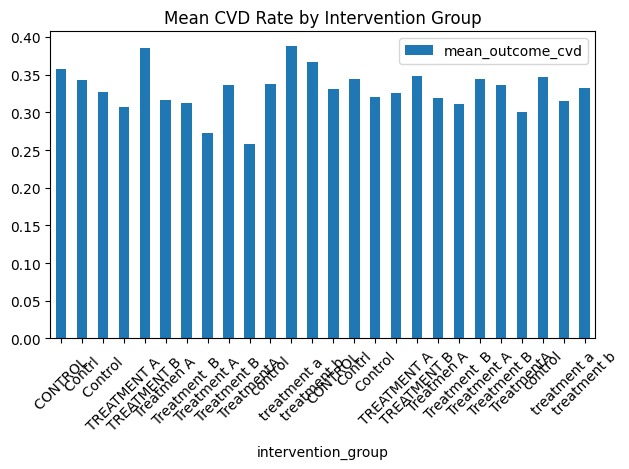

<Figure size 1000x600 with 0 Axes>

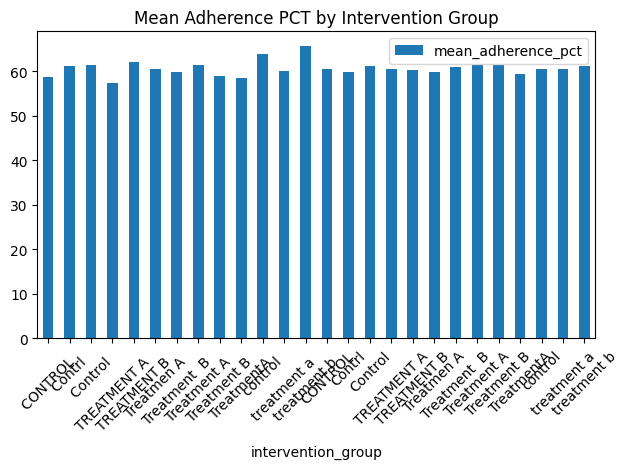

In [21]:
# TODO: Visualization
plot_group_comparison(cvd_summary, x_col = 'intervention_group', y_col = 'mean_outcome_cvd', title = "Mean CVD Rate by Intervention Group")
plot_group_comparison(adherence_summary, x_col = 'intervention_group', y_col = 'mean_adherence_pct', title = 'Mean Adherence PCT by Intervention Group')


## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [22]:
# TODO: Save summary outputs

site_summary.to_csv('output/q7_site_summary.csv')

intervention_comparison = pd.merge(cvd_summary, adherence_summary, on = 'intervention_group')
intervention_comparison.to_csv('output/q7_intervention_comparison.csv')

report = [
    "Final Report",
    "========================",
    "1. Summary by Site:",
    "Mean of age, bmi and systolic blood pressure by site:",
    site_summary.to_string(index = False),
    "",
    "2. Intervention Group Comparison:",
    "Mean outcome cvd rate by intervention group:",
    cvd_summary.to_string(index=False),
    "Mean adherence_pct by intervention group:",
    adherence_summary.to_string(index=False)

]

with open('output/q7_analysis_report.txt', 'w') as f:
    f.write('\n'.join(report))

## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. TODO
2. TODO
3. TODO
